In [5]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import json
# import os
# import time
# from google.colab import drive
# from getpass import getpass
# import yfinance as yf
# from sklearn.tree import DecisionTreeRegressor, _tree
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd


# # Set display options for pandas
# pd.set_option('display.max_columns', None)

# # Upload the dataframe df_fomc with all statements from 2000 to 2023
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/INTERNSHIP_ADAR1/Data/Input/Historical XBI Driver Data.xlsx'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


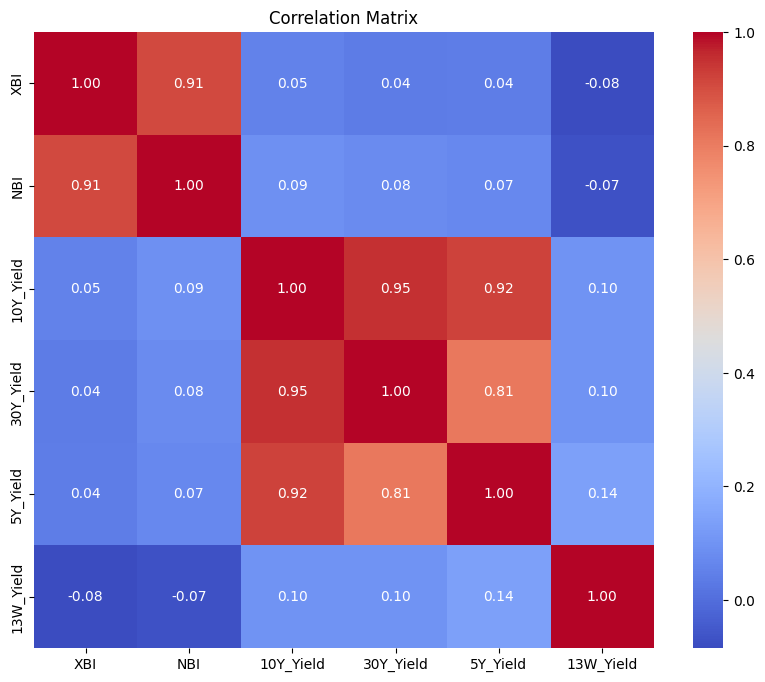

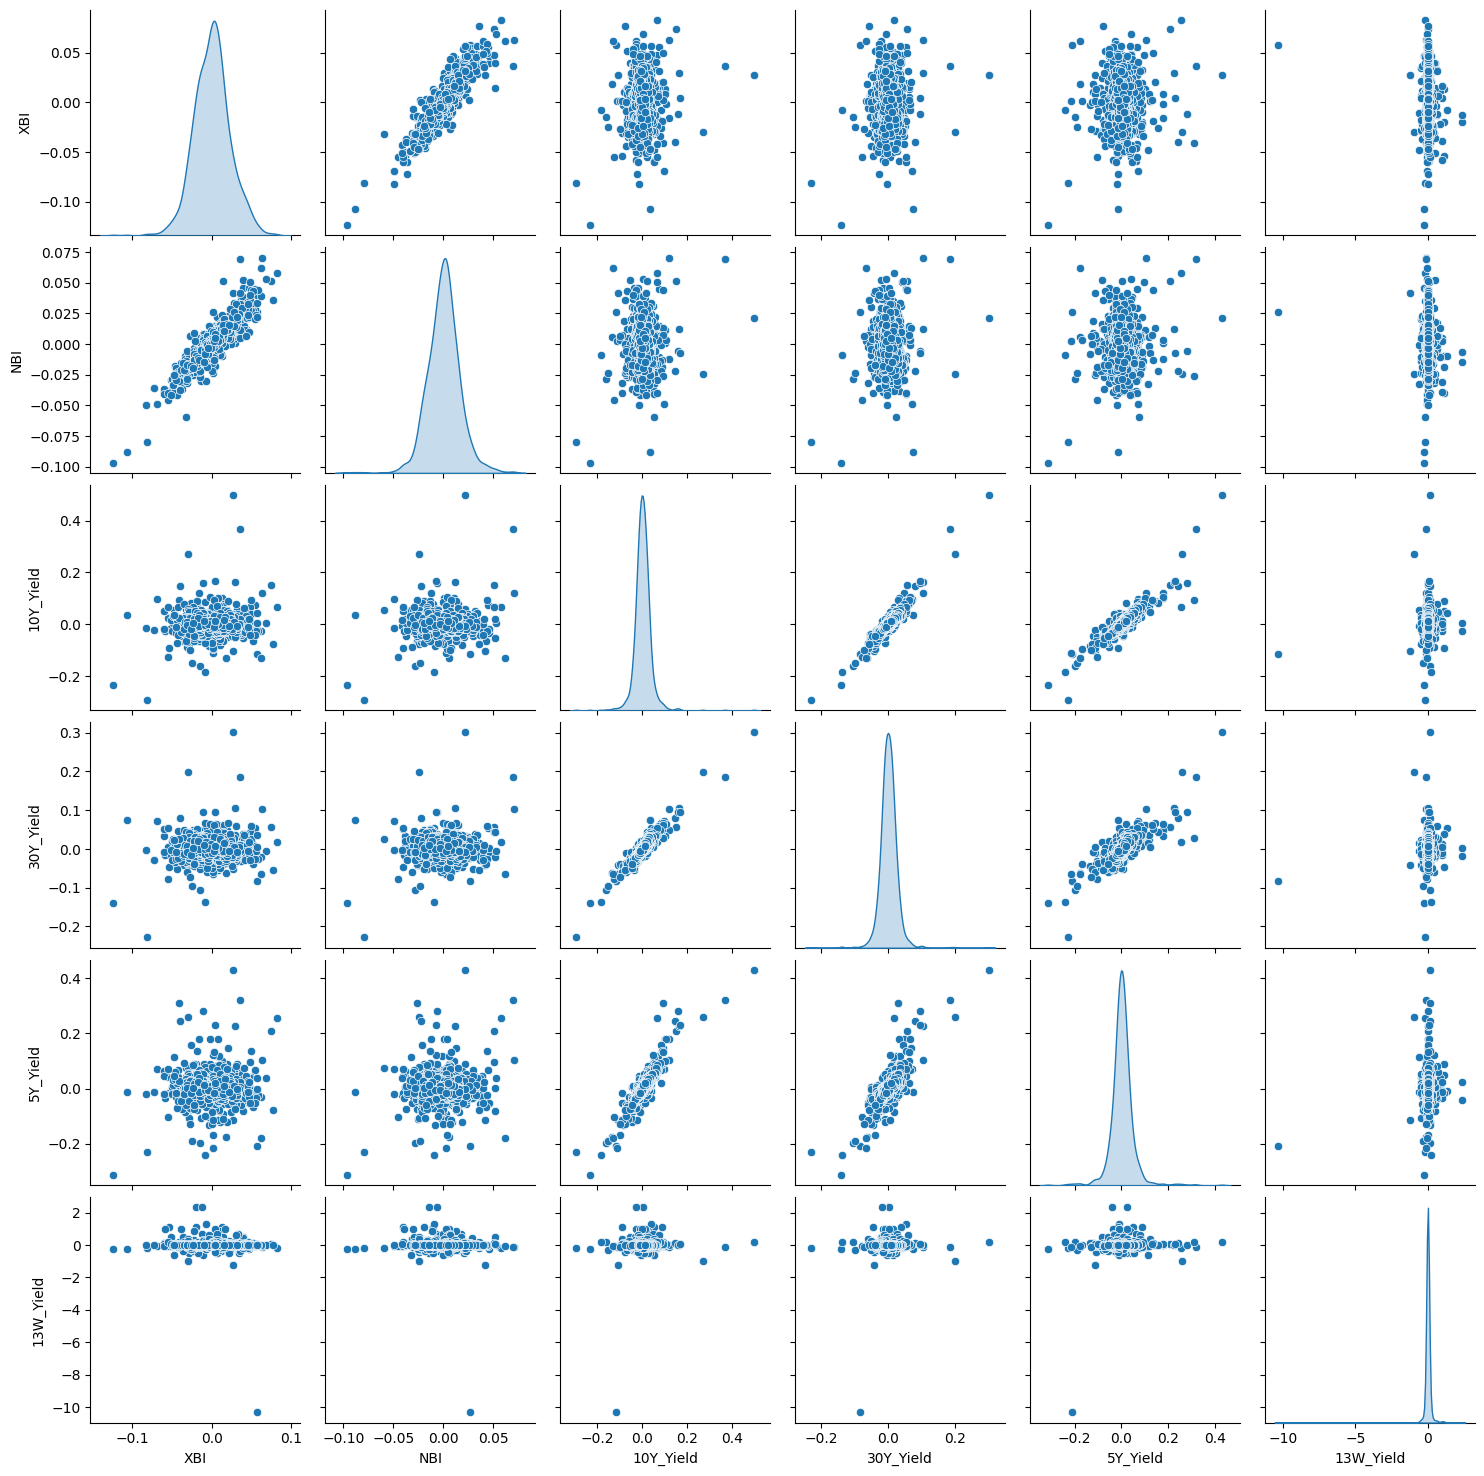

Stationarity Test Results (ADF Test):
XBI: stationary (p-value = 0.0000)
NBI: stationary (p-value = 0.0000)
10Y_Yield: stationary (p-value = 0.0000)
30Y_Yield: stationary (p-value = 0.0000)
5Y_Yield: stationary (p-value = 0.0000)
13W_Yield: stationary (p-value = 0.0000)

Granger Causality Test Results:
NBI Granger-causes XBI: True (p-values = [np.float64(0.0668), np.float64(0.009), np.float64(0.0211), np.float64(0.0201), np.float64(0.0307)])
10Y_Yield Granger-causes XBI: True (p-values = [np.float64(0.0003), np.float64(0.0019), np.float64(0.0052), np.float64(0.004), np.float64(0.0009)])
30Y_Yield Granger-causes XBI: True (p-values = [np.float64(0.0002), np.float64(0.0011), np.float64(0.0028), np.float64(0.0038), np.float64(0.0013)])
5Y_Yield Granger-causes XBI: True (p-values = [np.float64(0.0046), np.float64(0.0096), np.float64(0.0258), np.float64(0.0306), np.float64(0.0143)])
13W_Yield Granger-causes XBI: True (p-values = [np.float64(0.9101), np.float64(0.5404), np.float64(0.0515), n

c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools

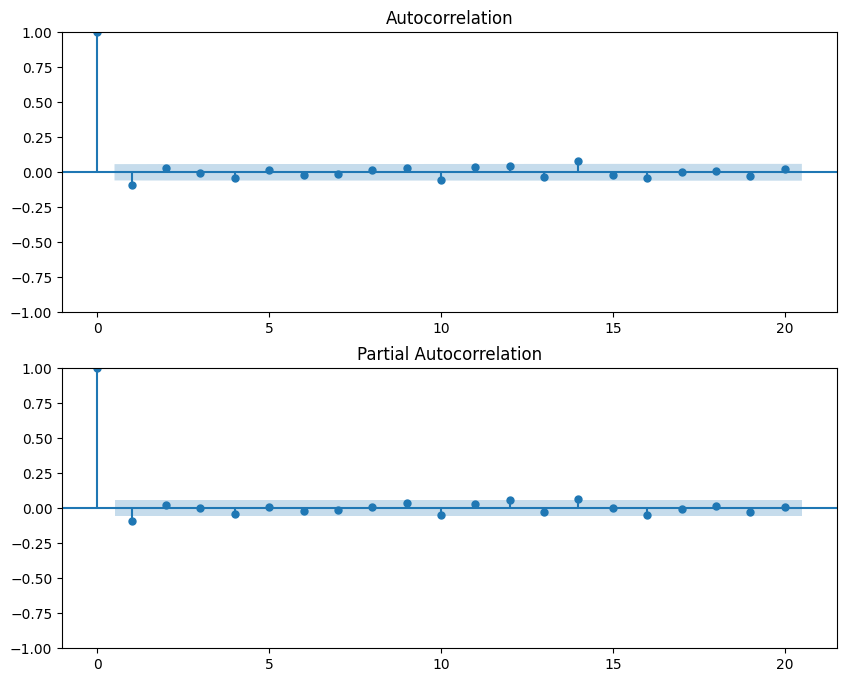

c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005226. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                    XBI   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:12:06   Log-Likelihood:                 3656.8
No. Observations:                1121   AIC:                            -7252.
Df Residuals:                    1090   BIC:                            -7096.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.000     -0.

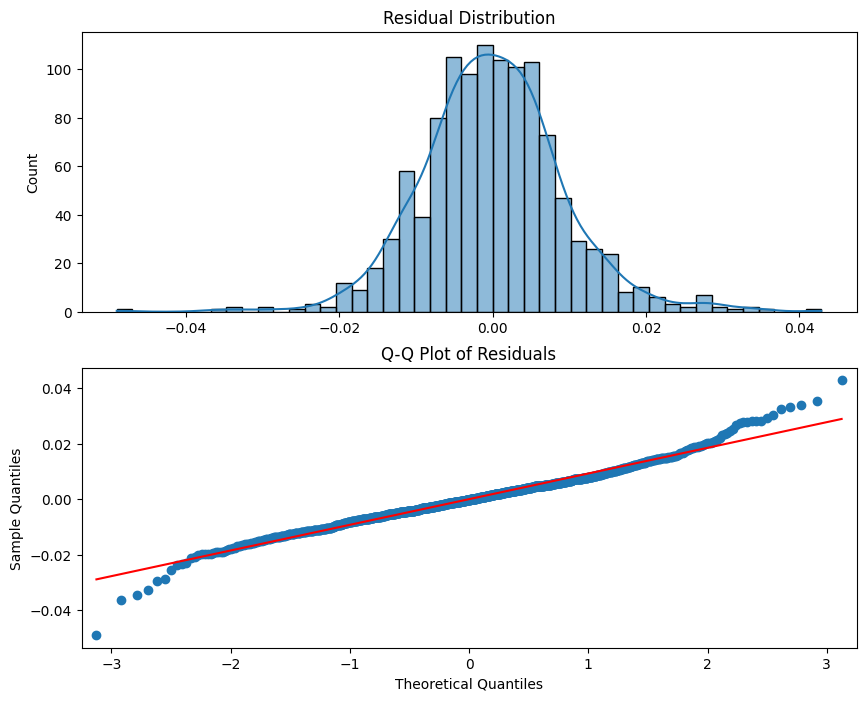

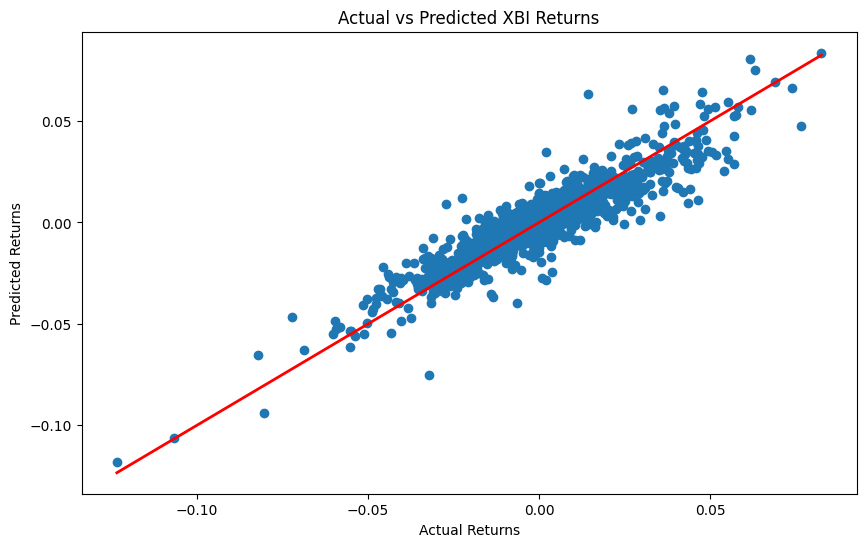

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import yfinance as yf

# Set display options for pandas
pd.set_option('display.max_columns', None)

# Function to fetch data for indices and bond yields
def fetch_data(tickers, start_date, end_date):
    return {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# Step 1: Data Fetching
start_date = '2000-01-01'
end_date = '2024-10-01'
index_tickers = ['XBI', 'NBI']
bond_yield_tickers = ['^TNX', '^TYX', '^FVX', '^IRX']

# Fetch data
index_data = fetch_data(index_tickers, start_date, end_date)
bond_yield_data = fetch_data(bond_yield_tickers, start_date, end_date)

# Step 2: Data Preprocessing
def process_returns(data):
    return data['Adj Close'].pct_change().dropna()

# Calculate percentage changes (returns) for indices and bond yields
xbi_returns = process_returns(index_data['XBI'])
nbi_returns = process_returns(index_data['NBI'])
bond_yield_pct = {ticker: process_returns(bond_yield_data[ticker]) for ticker in bond_yield_tickers}

# Combine all into a single DataFrame
combined_df = pd.concat([xbi_returns, nbi_returns, pd.DataFrame(bond_yield_pct)], axis=1).dropna()
combined_df.columns = ['XBI', 'NBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']

# Step 3: Exploratory Data Analysis (EDA)
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

def plot_pairwise_relationships(df):
    sns.pairplot(df, diag_kind='kde')
    plt.show()

# Plot correlation matrix and pairwise relationships
plot_correlation_matrix(combined_df)
plot_pairwise_relationships(combined_df)

# Step 4: Stationarity Check (ADF Test)
def adf_test(df):
    print("Stationarity Test Results (ADF Test):")
    for column in df.columns:
        result = adfuller(df[column])
        stationarity = "stationary" if result[1] < 0.05 else "non-stationary"
        print(f"{column}: {stationarity} (p-value = {result[1]:.4f})")

adf_test(combined_df)

# Step 5: Granger Causality Tests
def granger_causality(df, target_column='XBI', maxlag=5):
    print("\nGranger Causality Test Results:")
    for col in df.columns:
        if col != target_column:
            result = grangercausalitytests(df[[target_column, col]], maxlag=maxlag, verbose=False)
            p_values = [round(result[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
            cause = any(p_value < 0.05 for p_value in p_values)
            print(f"{col} Granger-causes {target_column}: {cause} (p-values = {p_values})")

granger_causality(combined_df)

# Step 6: Autocorrelation and Partial Autocorrelation
def plot_acf_pacf(series, lags=20):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(series, lags=lags, ax=ax1)
    plot_pacf(series, lags=lags, ax=ax2)
    plt.show()

plot_acf_pacf(combined_df['XBI'])

# Step 7: OLS Regression with Lag Variables
def create_lagged_features(df, columns, lags=5):
    for col in columns:
        for lag in range(1, lags+1):
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df.dropna()

lagged_df = create_lagged_features(combined_df.copy(), ['NBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield'])

# Define dependent and independent variables
X = sm.add_constant(lagged_df.drop(columns=['XBI']))
y = lagged_df['XBI']

# Fit OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Step 8: GARCH(1,1) Modeling for Volatility
garch_model = arch_model(combined_df['XBI'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')
print(garch_results.summary())

# Step 9: Residual Analysis
def residual_analysis(y_true, y_pred):
    residuals = y_true - y_pred
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    sns.histplot(residuals, kde=True, ax=ax1)
    ax1.set_title('Residual Distribution')

    sm.qqplot(residuals, line='s', ax=ax2)
    ax2.set_title('Q-Q Plot of Residuals')

    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.title('Actual vs Predicted XBI Returns')
    plt.show()

# Prediction and model evaluation
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse:.4f}, R-squared: {r2:.4f}")

# Perform residual analysis
residual_analysis(y, y_pred)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


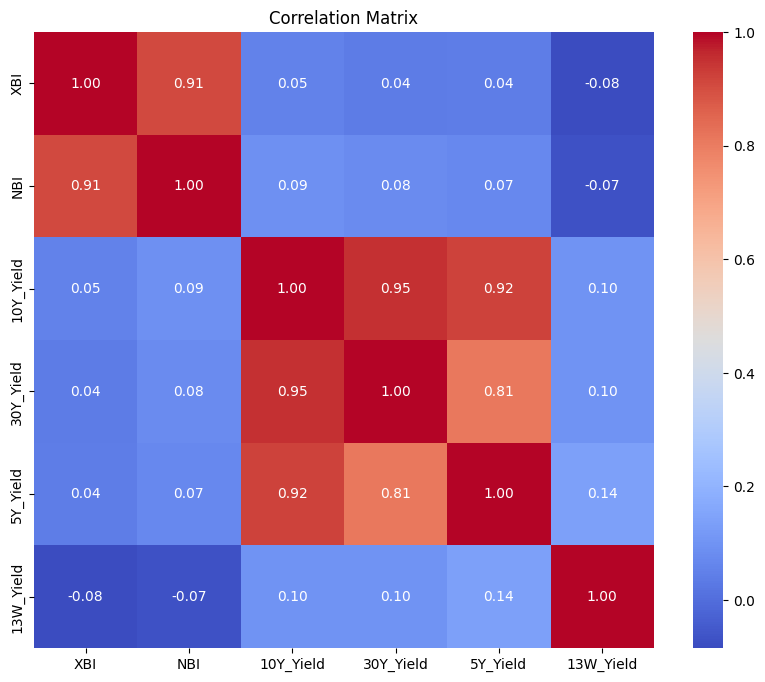

Correlation Matrix Analysis:
- NBI has a strong positive correlation with XBI (r = 0.91)
- 10Y_Yield has a weak correlation with XBI (r = 0.05)
- 30Y_Yield has a weak correlation with XBI (r = 0.04)
- 5Y_Yield has a weak correlation with XBI (r = 0.04)
- 13W_Yield has a weak correlation with XBI (r = -0.08)


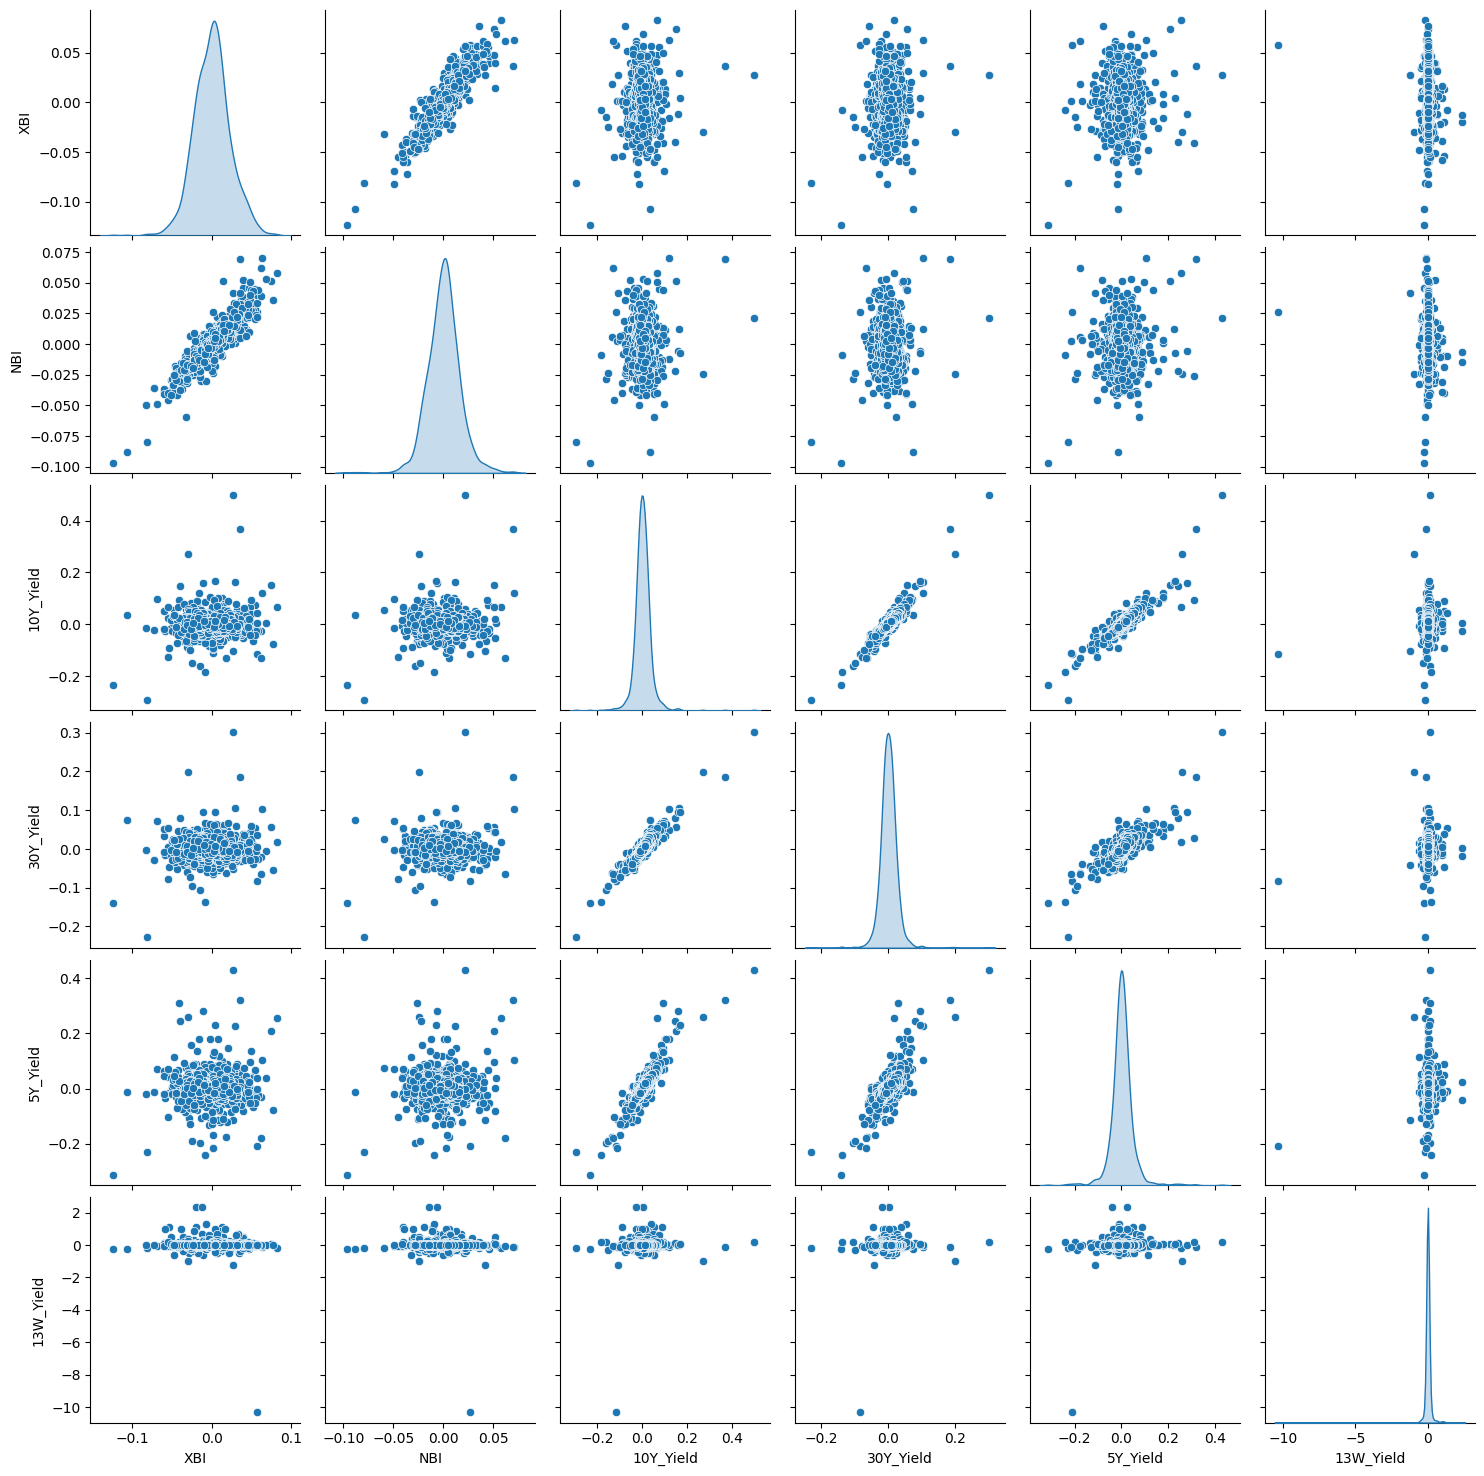


Stationarity Test Results (ADF Test):
- XBI is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- NBI is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 10Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 30Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 5Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 13W_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.

Granger Causality Test Results:
- NBI Granger-causes XBI (p-values = [np.float64(0.0668), np.float64(0.009), np.float64(0.0211), np.float64(0.0201), np.float64(0.0307)])
  Past values of NBI contain information that helps predict XBI.
- 10Y_Yield Grange

c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\statsmodels\tsa\stattools

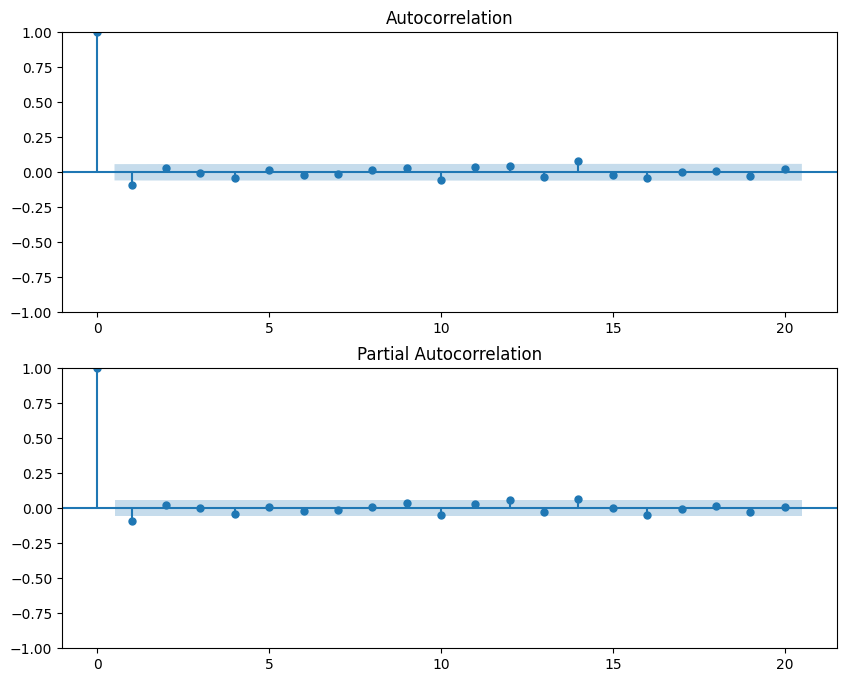

c:\Users\MukeshwaranBaskaran\Downloads\ADAR1_CODE\INTERNSHIP_ADAR1\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005226. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Autocorrelation (ACF) Analysis:
- Significant autocorrelation found at lags: [ 0  1 14]
  The series exhibits dependence on its past values at these lags.

Partial Autocorrelation (PACF) Analysis:
- Significant partial autocorrelation found at lags: [ 0  1 12 14]
  The series exhibits direct dependence on its past values at these lags.
                            OLS Regression Results                            
Dep. Variable:                    XBI   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:12:10   Log-Likelihood:                 3656.8
No. Observations:                1121   AIC:                            -7252.
Df Residuals:                    1090   BIC:                            -7096.
Df Model:                    

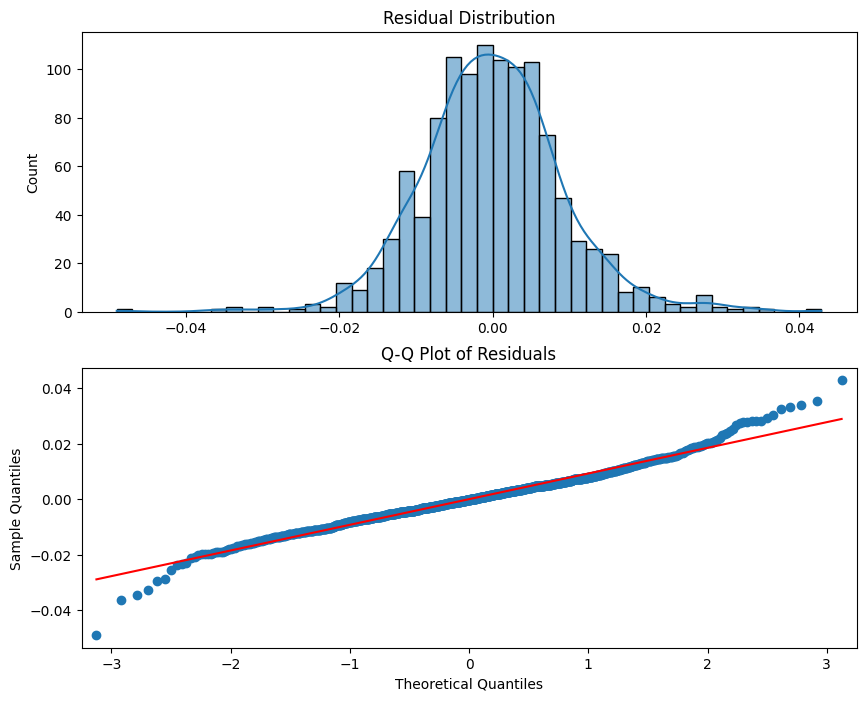

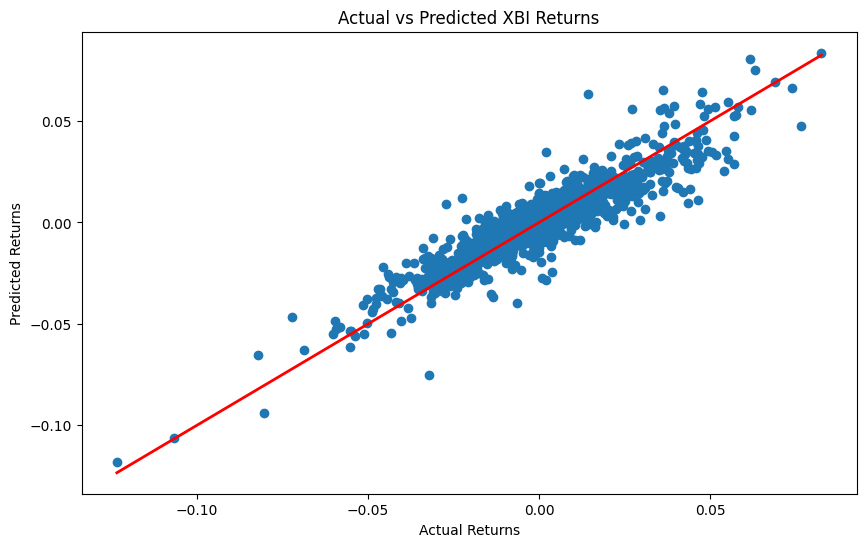


Residual Analysis:
- Mean of residuals: 0.0000
- Standard deviation of residuals: 0.0093
  The residuals have a mean close to zero, indicating an unbiased model.
  The residuals have a low standard deviation, indicating a good fit of the model.
- The residuals do not follow a normal distribution (p-value < 0.05).
  The model assumptions of normality may be violated.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import yfinance as yf
from scipy import stats

# Set display options for pandas
pd.set_option('display.max_columns', None)

# Function to fetch data for indices and bond yields
def fetch_data(tickers, start_date, end_date):
    return {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# Step 1: Data Fetching
start_date = '2000-01-01'
end_date = '2024-10-01'
index_tickers = ['XBI', 'NBI']
bond_yield_tickers = ['^TNX', '^TYX', '^FVX', '^IRX']

# Fetch data
index_data = fetch_data(index_tickers, start_date, end_date)
bond_yield_data = fetch_data(bond_yield_tickers, start_date, end_date)

# Step 2: Data Preprocessing
def process_returns(data):
    return data['Adj Close'].pct_change().dropna()

# Calculate percentage changes (returns) for indices and bond yields
xbi_returns = process_returns(index_data['XBI'])
nbi_returns = process_returns(index_data['NBI'])
bond_yield_pct = {ticker: process_returns(bond_yield_data[ticker]) for ticker in bond_yield_tickers}

# Combine all into a single DataFrame
combined_df = pd.concat([xbi_returns, nbi_returns, pd.DataFrame(bond_yield_pct)], axis=1).dropna()
combined_df.columns = ['XBI', 'NBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']

# Step 3: Exploratory Data Analysis (EDA)
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Analysis of correlation matrix
    print("Correlation Matrix Analysis:")
    for col in df.columns:
        if col != 'XBI':
            corr = corr_matrix.loc['XBI', col]
            if abs(corr) > 0.5:
                print(f"- {col} has a strong {'positive' if corr > 0 else 'negative'} correlation with XBI (r = {corr:.2f})")
            elif abs(corr) > 0.3:
                print(f"- {col} has a moderate {'positive' if corr > 0 else 'negative'} correlation with XBI (r = {corr:.2f})")
            else:
                print(f"- {col} has a weak correlation with XBI (r = {corr:.2f})")

def plot_pairwise_relationships(df):
    sns.pairplot(df, diag_kind='kde')
    plt.show()

# Plot correlation matrix and pairwise relationships
plot_correlation_matrix(combined_df)
plot_pairwise_relationships(combined_df)

# Step 4: Stationarity Check (ADF Test)
def adf_test(df):
    print("\nStationarity Test Results (ADF Test):")
    for column in df.columns:
        result = adfuller(df[column])
        if result[1] < 0.05:
            print(f"- {column} is stationary (p-value = {result[1]:.4f})")
            print("  The data does not have a unit root and is suitable for further analysis.")
        else:
            print(f"- {column} is non-stationary (p-value = {result[1]:.4f})")
            print("  The data has a unit root and may require differencing or other transformations.")

adf_test(combined_df)

# Step 5: Granger Causality Tests
def granger_causality(df, target_column='XBI', maxlag=5):
    print("\nGranger Causality Test Results:")
    for col in df.columns:
        if col != target_column:
            result = grangercausalitytests(df[[target_column, col]], maxlag=maxlag, verbose=False)
            p_values = [round(result[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
            if any(p_value < 0.05 for p_value in p_values):
                print(f"- {col} Granger-causes {target_column} (p-values = {p_values})")
                print(f"  Past values of {col} contain information that helps predict {target_column}.")
            else:
                print(f"- {col} does not Granger-cause {target_column} (p-values = {p_values})")
                print(f"  Past values of {col} do not significantly influence {target_column}.")

granger_causality(combined_df)

# Step 6: Autocorrelation and Partial Autocorrelation
def plot_acf_pacf(series, lags=20):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(series, lags=lags, ax=ax1)
    plot_pacf(series, lags=lags, ax=ax2)
    plt.show()

    # Analysis of ACF and PACF plots
    acf_values = sm.tsa.acf(series, nlags=lags)
    pacf_values = sm.tsa.pacf(series, nlags=lags)

    print("\nAutocorrelation (ACF) Analysis:")
    significant_lags = np.where(np.abs(acf_values) > 1.96 / np.sqrt(len(series)))[0]
    if len(significant_lags) > 0:
        print(f"- Significant autocorrelation found at lags: {significant_lags}")
        print("  The series exhibits dependence on its past values at these lags.")
    else:
        print("- No significant autocorrelation found.")
        print("  The series does not exhibit strong dependence on its past values.")

    print("\nPartial Autocorrelation (PACF) Analysis:")
    significant_lags = np.where(np.abs(pacf_values) > 1.96 / np.sqrt(len(series)))[0]
    if len(significant_lags) > 0:
        print(f"- Significant partial autocorrelation found at lags: {significant_lags}")
        print("  The series exhibits direct dependence on its past values at these lags.")
    else:
        print("- No significant partial autocorrelation found.")
        print("  The series does not exhibit strong direct dependence on its past values.")

plot_acf_pacf(combined_df['XBI'])

# Step 7: OLS Regression with Lag Variables
def create_lagged_features(df, columns, lags=5):
    for col in columns:
        for lag in range(1, lags+1):
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df.dropna()

lagged_df = create_lagged_features(combined_df.copy(), ['NBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield'])

# Define dependent and independent variables
X = sm.add_constant(lagged_df.drop(columns=['XBI']))
y = lagged_df['XBI']

# Fit OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Analysis of regression results
print("\nRegression Analysis:")
for var, p_value in zip(model.params.index, model.pvalues):
    if p_value < 0.05:
        print(f"- {var} is statistically significant (p-value = {p_value:.4f})")
        print(f"  {var} has a significant impact on XBI returns.")
    else:
        print(f"- {var} is not statistically significant (p-value = {p_value:.4f})")
        print(f"  {var} does not have a significant impact on XBI returns.")

# Step 8: GARCH(1,1) Modeling for Volatility
garch_model = arch_model(combined_df['XBI'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')
print(garch_results.summary())

# Analysis of GARCH results
print("\nGARCH(1,1) Volatility Analysis:")
if garch_results.pvalues['omega'] < 0.05:
    print("- The constant term (omega) is statistically significant.")
    print("  There is a significant long-term average volatility.")
else:
    print("- The constant term (omega) is not statistically significant.")
    print("  The long-term average volatility is not significantly different from zero.")

if garch_results.pvalues['alpha[1]'] < 0.05:
    print("- The ARCH term (alpha[1]) is statistically significant.")
    print("  Past volatility has a significant impact on current volatility.")
else:
    print("- The ARCH term (alpha[1]) is not statistically significant.")
    print("  Past volatility does not have a significant impact on current volatility.")

if garch_results.pvalues['beta[1]'] < 0.05:
    print("- The GARCH term (beta[1]) is statistically significant.")
    print("  Past conditional variance has a significant impact on current volatility.")
else:
    print("- The GARCH term (beta[1]) is not statistically significant.")
    print("  Past conditional variance does not have a significant impact on current volatility.")

# Step 9: Residual Analysis
def residual_analysis(y_true, y_pred):
    residuals = y_true - y_pred
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    sns.histplot(residuals, kde=True, ax=ax1)
    ax1.set_title('Residual Distribution')

    sm.qqplot(residuals, line='s', ax=ax2)
    ax2.set_title('Q-Q Plot of Residuals')

    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.title('Actual vs Predicted XBI Returns')
    plt.show()

    # Analysis of residuals
    print("\nResidual Analysis:")
    residual_mean = np.mean(residuals)
    residual_std = np.std(residuals)
    print(f"- Mean of residuals: {residual_mean:.4f}")
    print(f"- Standard deviation of residuals: {residual_std:.4f}")

    if abs(residual_mean) < 0.01:
        print("  The residuals have a mean close to zero, indicating an unbiased model.")
    else:
        print("  The residuals have a non-zero mean, indicating potential bias in the model.")

    if residual_std < 0.05:
        print("  The residuals have a low standard deviation, indicating a good fit of the model.")
    else:
        print("  The residuals have a high standard deviation, indicating potential issues with the model fit.")

    _, p_value = stats.normaltest(residuals)
    if p_value < 0.05:
        print("- The residuals do not follow a normal distribution (p-value < 0.05).")
        print("  The model assumptions of normality may be violated.")
    else:
        print("- The residuals follow a normal distribution (p-value >= 0.05).")
        print("  The model assumptions of normality are satisfied.")

# Prediction and model evaluation
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"\nModel Evaluation:")
print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"- R-squared: {r2:.4f}")

if r2 > 0.7:
    print("  The model has a high R-squared value, indicating a good fit to the data.")
else:
    print("  The model has a low R-squared value, indicating a poor fit to the data.")

# Perform residual analysis
residual_analysis(y, y_pred)

In [8]:
# Step 10: Decision Tree Model
# Prepare the data for the tree model
tree_data = combined_df[['NBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield', 'XBI']].copy()

# Create bins for the variables
num_bins = 5
for col in tree_data.columns[:-1]:
    tree_data[f'{col}_bin'] = pd.qcut(tree_data[col], q=num_bins, labels=False)

# Define the features (X) and target variable (y)
X = tree_data.drop(columns=['XBI'])
y = tree_data['XBI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the tree model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"\nDecision Tree Model Evaluation:")
print(f"- Mean Absolute Error (MAE): {mae_tree:.4f}")
print(f"- Root Mean Squared Error (RMSE): {rmse_tree:.4f}")

# Analyze the tree model results
print("\nDecision Tree Model Analysis:")
if mae_tree < 0.01:
    print("- The tree model has a low Mean Absolute Error (MAE < 0.01), indicating good performance.")
else:
    print("- The tree model has a high Mean Absolute Error (MAE >= 0.01), indicating poor performance.")

if rmse_tree < 0.05:
    print("- The tree model has a low Root Mean Squared Error (RMSE < 0.05), indicating good performance.")
else:
    print("- The tree model has a high Root Mean Squared Error (RMSE >= 0.05), indicating poor performance.")

# Print the decision tree rules
print("\nDecision Tree Rules:")
tree_ = tree_model.tree_
feature_names = X.columns

# Helper function to print the decision tree rules
def print_tree_rules(node, depth=0):
    indent = "    " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Not a leaf node
        name = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]
        print(f"{indent}IF {name} <= {threshold:.4f}:")
        print_tree_rules(tree_.children_left[node], depth + 1)
        print(f"{indent}ELSE (if {name} > {threshold:.4f}):")
        print_tree_rules(tree_.children_right[node], depth + 1)
    else:  # Leaf node
        prediction = tree_.value[node][0][0]
        print(f"{indent}THEN XBI = {prediction:.4f}")

# Call the function to print tree rules from the root node
print("\nDecision Tree Rules:")
print_tree_rules(0)

# Feature importance analysis
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance:")
for feature, importance in zip(feature_names[indices], importances[indices]):
    print(f"- {feature}: {importance:.4f}")

NameError: name 'train_test_split' is not defined

In [7]:
# Step 10: Decision Tree Model
# Prepare the data for the tree model
tree_data = combined_df[['NBI', 'XBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']].copy()

# Add NBI and XBI prices (assuming they are available in the original data)
tree_data['NBI_Price'] = index_data['NBI']['Adj Close']
tree_data['XBI_Price'] = index_data['XBI']['Adj Close']

# Create bins for the variables
num_bins = 5
for col in tree_data.columns:
    if col != 'XBI' and col != 'XBI_Price':  # Don't bin the target variables
        tree_data[f'{col}_bin'] = pd.qcut(tree_data[col], q=num_bins, labels=False)

# Define the features (X) and target variable (y)
X = tree_data.drop(columns=['XBI', 'XBI_Price'])
y = tree_data['XBI_Price']  # Predict XBI price instead of returns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the tree model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"\nDecision Tree Model Evaluation:")
print(f"- Mean Absolute Error (MAE): {mae_tree:.4f}")
print(f"- Root Mean Squared Error (RMSE): {rmse_tree:.4f}")

# Analyze the tree model results
print("\nDecision Tree Model Analysis:")
if mae_tree < 1:
    print("- The tree model has a low Mean Absolute Error (MAE < 1), indicating good performance.")
else:
    print("- The tree model has a high Mean Absolute Error (MAE >= 1), indicating poor performance.")

if rmse_tree < 2:
    print("- The tree model has a low Root Mean Squared Error (RMSE < 2), indicating good performance.")
else:
    print("- The tree model has a high Root Mean Squared Error (RMSE >= 2), indicating poor performance.")

# Print the decision tree rules
print("\nDecision Tree Rules:")
tree_ = tree_model.tree_
feature_names = X.columns

# Helper function to print the decision tree rules
def print_tree_rules(node, depth=0):
    indent = "    " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Not a leaf node
        name = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]
        print(f"{indent}IF {name} <= {threshold:.4f}:")
        print_tree_rules(tree_.children_left[node], depth + 1)
        print(f"{indent}ELSE (if {name} > {threshold:.4f}):")
        print_tree_rules(tree_.children_right[node], depth + 1)
    else:  # Leaf node
        prediction = tree_.value[node][0][0]
        print(f"{indent}THEN XBI_Price = {prediction:.4f}")

# Call the function to print tree rules from the root node
print("\nDecision Tree Rules:")
print_tree_rules(0)

# Feature importance analysis
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance:")
for feature, importance in zip(feature_names[indices], importances[indices]):
    print(f"- {feature}: {importance:.4f}")


Decision Tree Model Evaluation:
- Mean Absolute Error (MAE): 7.7038
- Root Mean Squared Error (RMSE): 10.8555

Decision Tree Model Analysis:
- The tree model has a high Mean Absolute Error (MAE >= 1), indicating poor performance.
- The tree model has a high Root Mean Squared Error (RMSE >= 2), indicating poor performance.

Decision Tree Rules:

Decision Tree Rules:
IF NBI_Price <= 4551.1050:
    IF NBI_Price <= 4095.4501:
        IF NBI_Price <= 3820.0900:
            IF 13W_Yield <= -0.0069:
                IF NBI_Price <= 3454.7550:
                    THEN XBI_Price = 71.3384
                ELSE (if NBI_Price > 3454.7550):
                    THEN XBI_Price = 81.6204
            ELSE (if 13W_Yield > -0.0069):
                IF 10Y_Yield <= 0.0374:
                    THEN XBI_Price = 70.4747
                ELSE (if 10Y_Yield > 0.0374):
                    THEN XBI_Price = 76.4819
        ELSE (if NBI_Price > 3820.0900):
            IF 13W_Yield <= -0.0122:
                IF NBI

# WITHOUT NBI - Focus XBI

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


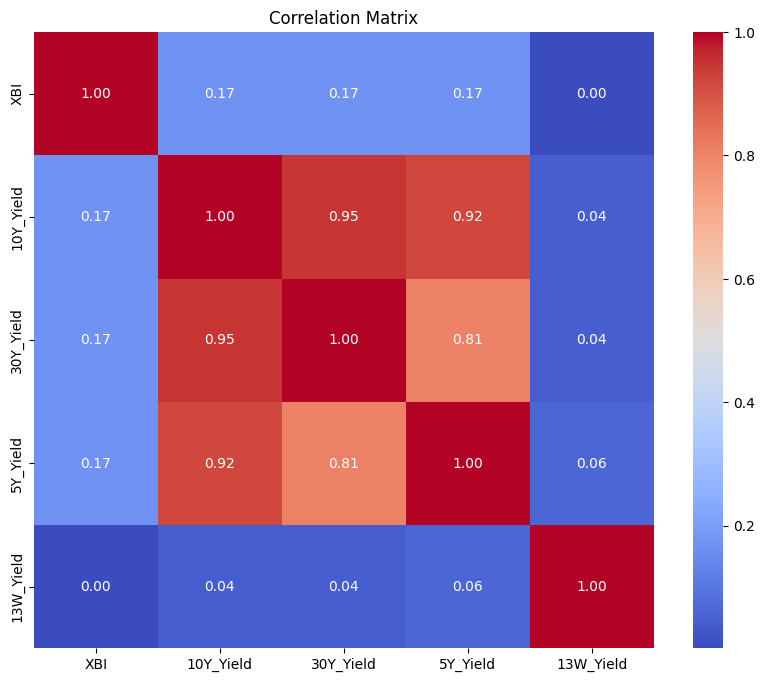

Correlation Matrix Analysis:
- 10Y_Yield has a weak correlation with XBI (r = 0.17)
- 30Y_Yield has a weak correlation with XBI (r = 0.17)
- 5Y_Yield has a weak correlation with XBI (r = 0.17)
- 13W_Yield has a weak correlation with XBI (r = 0.00)


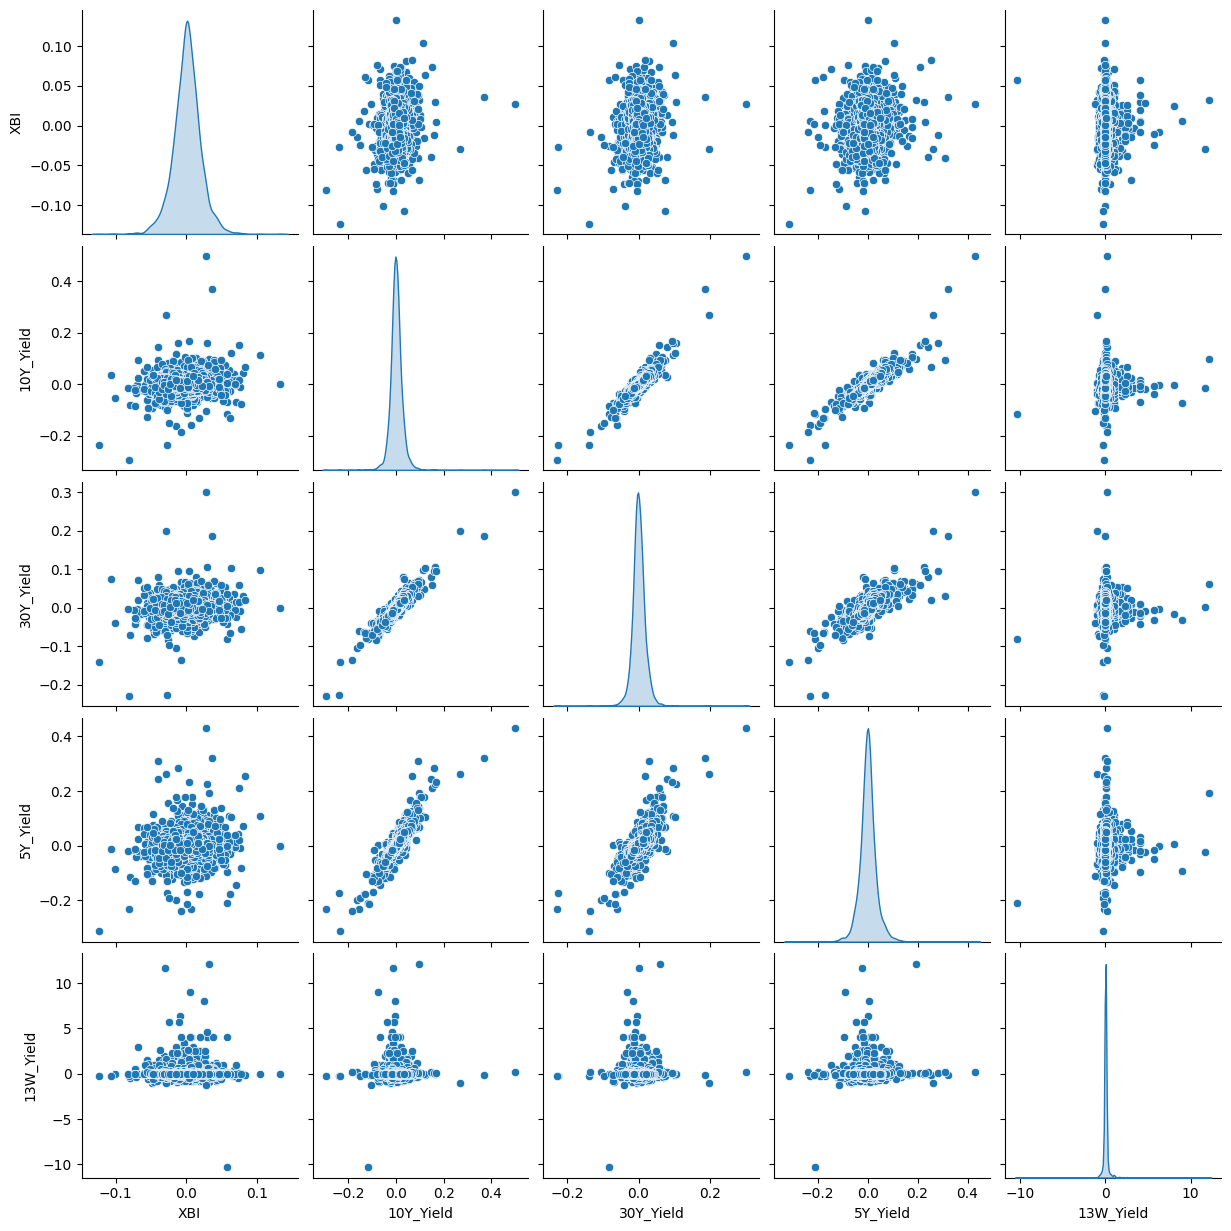


Stationarity Test Results (ADF Test):
- XBI is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 10Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 30Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 5Y_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.
- 13W_Yield is stationary (p-value = 0.0000)
  The data does not have a unit root and is suitable for further analysis.

Granger Causality Test Results:
- 10Y_Yield Granger-causes XBI (p-values = [0.0024, 0.007, 0.0186])
  Past values of 10Y_Yield contain information that helps predict XBI.
- 30Y_Yield Granger-causes XBI (p-values = [0.0244, 0.0732, 0.1523])
  Past values of 30Y_Yield contain information that helps predict XBI.
- 5Y_Yield Granger-causes XBI (p-values = [0.0062, 0.011

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


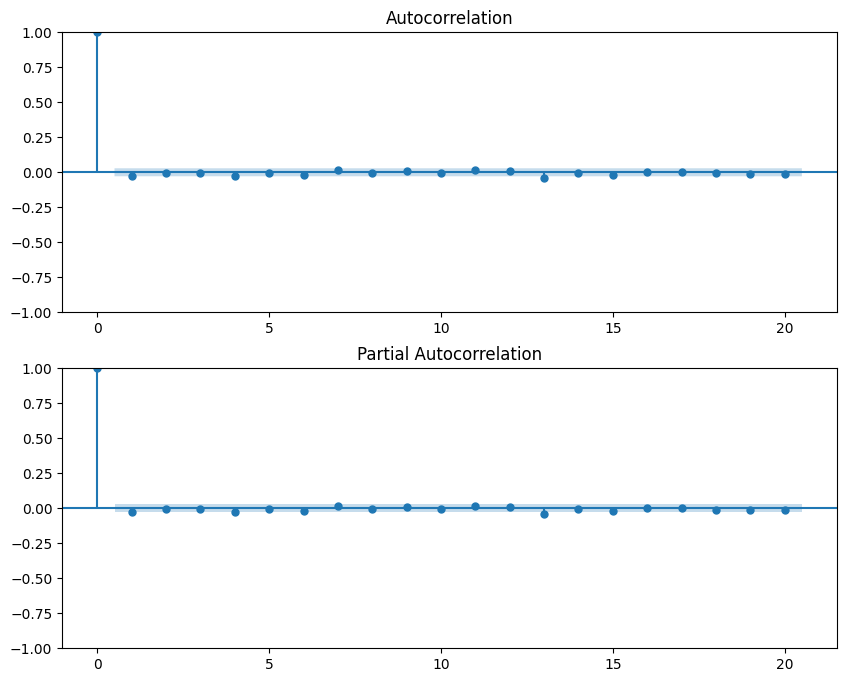


Autocorrelation (ACF) Analysis:
- Significant autocorrelation found at lags: [ 0 13]
  The series exhibits dependence on its past values at these lags.

Partial Autocorrelation (PACF) Analysis:
- Significant partial autocorrelation found at lags: [ 0  4 13]
  The series exhibits direct dependence on its past values at these lags.
                            OLS Regression Results                            
Dep. Variable:                    XBI   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     7.954
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.64e-27
Time:                        14:32:22   Log-Likelihood:                 11923.
No. Observations:                4689   AIC:                        -2.380e+04
Df Residuals:                    4664   BIC:                        -2.363e+04
Df Model:                          

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003767. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


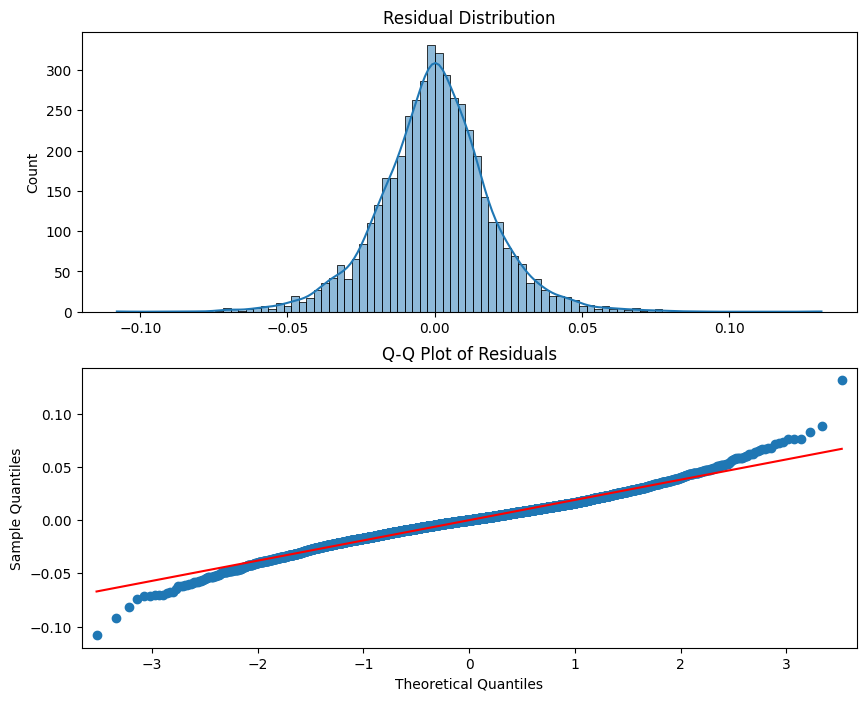

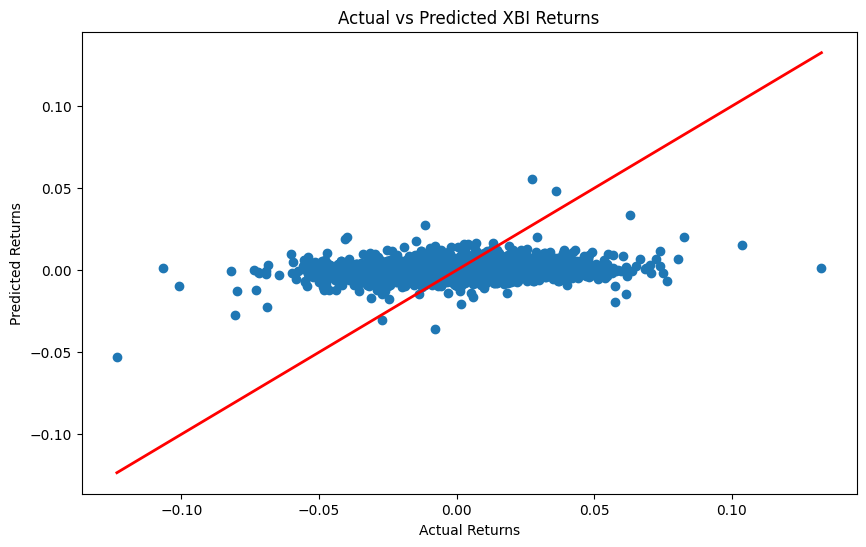


Residual Analysis:
- Mean of residuals: -0.0000
- Standard deviation of residuals: 0.0190
  The residuals have a mean close to zero, indicating an unbiased model.
  The residuals have a low standard deviation, indicating a good fit of the model.
- The residuals do not follow a normal distribution (p-value < 0.05).
  The model assumptions of normality may be violated.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import yfinance as yf
from scipy import stats

# Set display options for pandas
pd.set_option('display.max_columns', None)

# Function to fetch data for indices and bond yields
def fetch_data(tickers, start_date, end_date):
    return {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# Step 1: Data Fetching
start_date = '2000-01-01'
end_date = '2024-10-07'
index_tickers = ['XBI'] #, 'NBI'
bond_yield_tickers = ['^TNX', '^TYX', '^FVX', '^IRX']

# ^TNX = 10-year Treasury note yield
# ^TYX = 30-year Treasury bond yield
# ^FVX = 5-year Treasury note yield
# ^IRX = 13-week Treasury bill yield

# Fetch data
index_data = fetch_data(index_tickers, start_date, end_date)
bond_yield_data = fetch_data(bond_yield_tickers, start_date, end_date)

# Step 2: Data Preprocessing
def process_returns(data):
    return data['Adj Close'].pct_change().dropna()

# Calculate percentage changes (returns) for indices and bond yields
xbi_returns = process_returns(index_data['XBI'])
bond_yield_pct = {ticker: process_returns(bond_yield_data[ticker]) for ticker in bond_yield_tickers}

# Combine all into a single DataFrame
combined_df = pd.concat([xbi_returns, pd.DataFrame(bond_yield_pct)], axis=1).dropna()
combined_df.columns = ['XBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']

# Step 3: Exploratory Data Analysis (EDA)
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Analysis of correlation matrix
    print("Correlation Matrix Analysis:")
    for col in df.columns:
        if col != 'XBI':
            corr = corr_matrix.loc['XBI', col]
            if abs(corr) > 0.5:
                print(f"- {col} has a strong {'positive' if corr > 0 else 'negative'} correlation with XBI (r = {corr:.2f})")
            elif abs(corr) > 0.3:
                print(f"- {col} has a moderate {'positive' if corr > 0 else 'negative'} correlation with XBI (r = {corr:.2f})")
            else:
                print(f"- {col} has a weak correlation with XBI (r = {corr:.2f})")

def plot_pairwise_relationships(df):
    sns.pairplot(df, diag_kind='kde')
    plt.show()

# Plot correlation matrix and pairwise relationships
plot_correlation_matrix(combined_df)
plot_pairwise_relationships(combined_df)

# Step 4: Stationarity Check (ADF Test)
def adf_test(df):
    print("\nStationarity Test Results (ADF Test):")
    for column in df.columns:
        result = adfuller(df[column])
        if result[1] < 0.05:
            print(f"- {column} is stationary (p-value = {result[1]:.4f})")
            print("  The data does not have a unit root and is suitable for further analysis.")
        else:
            print(f"- {column} is non-stationary (p-value = {result[1]:.4f})")
            print("  The data has a unit root and may require differencing or other transformations.")

adf_test(combined_df)

# Step 5: Granger Causality Tests
def granger_causality(df, target_column='XBI', maxlag=3):
    print("\nGranger Causality Test Results:")
    for col in df.columns:
        if col != target_column:
            result = grangercausalitytests(df[[target_column, col]], maxlag=maxlag, verbose=False)
            p_values = [round(result[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
            if any(p_value < 0.05 for p_value in p_values):
                print(f"- {col} Granger-causes {target_column} (p-values = {p_values})")
                print(f"  Past values of {col} contain information that helps predict {target_column}.")
            else:
                print(f"- {col} does not Granger-cause {target_column} (p-values = {p_values})")
                print(f"  Past values of {col} do not significantly influence {target_column}.")

granger_causality(combined_df)

# Step 6: Autocorrelation and Partial Autocorrelation
def plot_acf_pacf(series, lags=20):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(series, lags=lags, ax=ax1)
    plot_pacf(series, lags=lags, ax=ax2)
    plt.show()

    # Analysis of ACF and PACF plots
    acf_values = sm.tsa.acf(series, nlags=lags)
    pacf_values = sm.tsa.pacf(series, nlags=lags)

    print("\nAutocorrelation (ACF) Analysis:")
    significant_lags = np.where(np.abs(acf_values) > 1.96 / np.sqrt(len(series)))[0]
    if len(significant_lags) > 0:
        print(f"- Significant autocorrelation found at lags: {significant_lags}")
        print("  The series exhibits dependence on its past values at these lags.")
    else:
        print("- No significant autocorrelation found.")
        print("  The series does not exhibit strong dependence on its past values.")

    print("\nPartial Autocorrelation (PACF) Analysis:")
    significant_lags = np.where(np.abs(pacf_values) > 1.96 / np.sqrt(len(series)))[0]
    if len(significant_lags) > 0:
        print(f"- Significant partial autocorrelation found at lags: {significant_lags}")
        print("  The series exhibits direct dependence on its past values at these lags.")
    else:
        print("- No significant partial autocorrelation found.")
        print("  The series does not exhibit strong direct dependence on its past values.")

plot_acf_pacf(combined_df['XBI'])

# Step 7: OLS Regression with Lag Variables
def create_lagged_features(df, columns, lags=5):
    for col in columns:
        for lag in range(1, lags+1):
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df.dropna()

lagged_df = create_lagged_features(combined_df.copy(), ['10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield'])

# Define dependent and independent variables
X = sm.add_constant(lagged_df.drop(columns=['XBI']))
y = lagged_df['XBI']

# Fit OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Analysis of regression results
print("\nRegression Analysis:")
for var, p_value in zip(model.params.index, model.pvalues):
    if p_value < 0.05:
        print(f"- {var} is statistically significant (p-value = {p_value:.4f})")
        print(f"  {var} has a significant impact on XBI returns.")
    else:
        print(f"- {var} is not statistically significant (p-value = {p_value:.4f})")
        print(f"  {var} does not have a significant impact on XBI returns.")

# Step 8: GARCH(1,1) Modeling for Volatility
garch_model = arch_model(combined_df['XBI'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')
print(garch_results.summary())

# Analysis of GARCH results
print("\nGARCH(1,1) Volatility Analysis:")
if garch_results.pvalues['omega'] < 0.05:
    print("- The constant term (omega) is statistically significant.")
    print("  There is a significant long-term average volatility.")
else:
    print("- The constant term (omega) is not statistically significant.")
    print("  The long-term average volatility is not significantly different from zero.")

if garch_results.pvalues['alpha[1]'] < 0.05:
    print("- The ARCH term (alpha[1]) is statistically significant.")
    print("  Past volatility has a significant impact on current volatility.")
else:
    print("- The ARCH term (alpha[1]) is not statistically significant.")
    print("  Past volatility does not have a significant impact on current volatility.")

if garch_results.pvalues['beta[1]'] < 0.05:
    print("- The GARCH term (beta[1]) is statistically significant.")
    print("  Past conditional variance has a significant impact on current volatility.")
else:
    print("- The GARCH term (beta[1]) is not statistically significant.")
    print("  Past conditional variance does not have a significant impact on current volatility.")

# Step 9: Residual Analysis
def residual_analysis(y_true, y_pred):
    residuals = y_true - y_pred
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    sns.histplot(residuals, kde=True, ax=ax1)
    ax1.set_title('Residual Distribution')

    sm.qqplot(residuals, line='s', ax=ax2)
    ax2.set_title('Q-Q Plot of Residuals')

    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.title('Actual vs Predicted XBI Returns')
    plt.show()

    # Analysis of residuals
    print("\nResidual Analysis:")
    residual_mean = np.mean(residuals)
    residual_std = np.std(residuals)
    print(f"- Mean of residuals: {residual_mean:.4f}")
    print(f"- Standard deviation of residuals: {residual_std:.4f}")

    if abs(residual_mean) < 0.01:
        print("  The residuals have a mean close to zero, indicating an unbiased model.")
    else:
        print("  The residuals have a non-zero mean, indicating potential bias in the model.")

    if residual_std < 0.05:
        print("  The residuals have a low standard deviation, indicating a good fit of the model.")
    else:
        print("  The residuals have a high standard deviation, indicating potential issues with the model fit.")

    _, p_value = stats.normaltest(residuals)
    if p_value < 0.05:
        print("- The residuals do not follow a normal distribution (p-value < 0.05).")
        print("  The model assumptions of normality may be violated.")
    else:
        print("- The residuals follow a normal distribution (p-value >= 0.05).")
        print("  The model assumptions of normality are satisfied.")

# Prediction and model evaluation
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"\nModel Evaluation:")
print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"- R-squared: {r2:.4f}")

if r2 > 0.7:
    print("  The model has a high R-squared value, indicating a good fit to the data.")
else:
    print("  The model has a low R-squared value, indicating a poor fit to the data.")

# Perform residual analysis
residual_analysis(y, y_pred)

In [11]:
# Step 10: Decision Tree Model
# Prepare the data for the tree model
tree_data = combined_df[['XBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']].copy()

# Add NBI and XBI prices (assuming they are available in the original data)
tree_data['XBI_Price'] = index_data['XBI']['Adj Close']

# Create bins for the variables
num_bins = 3
for col in tree_data.columns:
    if col != 'XBI' and col != 'XBI_Price':  # Don't bin the target variables
        tree_data[f'{col}_bin'] = pd.qcut(tree_data[col], q=num_bins, labels=False)

# Define the features (X) and target variable (y)
X = tree_data.drop(columns=['XBI', 'XBI_Price'])
y = tree_data['XBI_Price']  # Predict XBI price instead of returns

# Split the data into training and testing sets
# Split the data into training and testing sets based on time
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the tree model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"\nDecision Tree Model Evaluation:")
print(f"- Mean Absolute Error (MAE): {mae_tree:.4f}")
print(f"- Root Mean Squared Error (RMSE): {rmse_tree:.4f}")

# Analyze the tree model results
print("\nDecision Tree Model Analysis:")
if mae_tree < 1:
    print("- The tree model has a low Mean Absolute Error (MAE < 1), indicating good performance.")
else:
    print("- The tree model has a high Mean Absolute Error (MAE >= 1), indicating poor performance.")

if rmse_tree < 2:
    print("- The tree model has a low Root Mean Squared Error (RMSE < 2), indicating good performance.")
else:
    print("- The tree model has a high Root Mean Squared Error (RMSE >= 2), indicating poor performance.")

# Print the decision tree rules
print("\nDecision Tree Rules:")
tree_ = tree_model.tree_
feature_names = X.columns

# Helper function to print the decision tree rules
def print_tree_rules(node, depth=0):
    indent = "    " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Not a leaf node
        name = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]
        print(f"{indent}IF {name} <= {threshold:.4f}:")
        print_tree_rules(tree_.children_left[node], depth + 1)
        print(f"{indent}ELSE (if {name} > {threshold:.4f}):")
        print_tree_rules(tree_.children_right[node], depth + 1)
    else:  # Leaf node
        prediction = tree_.value[node][0][0]
        print(f"{indent}THEN XBI_Price = {prediction:.4f}")

# Call the function to print tree rules from the root node
print("\nDecision Tree Rules:")
print_tree_rules(0)

# Feature importance analysis
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance:")
for feature, importance in zip(feature_names[indices], importances[indices]):
    print(f"- {feature}: {importance:.4f}")


Decision Tree Model Evaluation:
- Mean Absolute Error (MAE): 48.0431
- Root Mean Squared Error (RMSE): 55.7446

Decision Tree Model Analysis:
- The tree model has a high Mean Absolute Error (MAE >= 1), indicating poor performance.
- The tree model has a high Root Mean Squared Error (RMSE >= 2), indicating poor performance.

Decision Tree Rules:

Decision Tree Rules:
IF 13W_Yield <= -0.0293:
    IF 10Y_Yield <= -0.0638:
        IF 13W_Yield <= -0.3741:
            IF 10Y_Yield <= -0.0748:
                IF 5Y_Yield <= -0.1132:
                    THEN XBI_Price = 42.1848
                ELSE (if 5Y_Yield > -0.1132):
                    THEN XBI_Price = 76.6890
            ELSE (if 10Y_Yield > -0.0748):
                IF 13W_Yield <= -0.6226:
                    THEN XBI_Price = 15.8335
                ELSE (if 13W_Yield > -0.6226):
                    THEN XBI_Price = 19.7096
        ELSE (if 13W_Yield > -0.3741):
            IF 5Y_Yield <= -0.2310:
                IF 30Y_Yield <= -0

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare the data for the tree model
tree_data = combined_df[['XBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']].copy()
tree_data.head()
tree_data['XBI_Price'] = index_data['XBI']['Adj Close']

# Create bins for the variables
num_bins = 3
for col in tree_data.columns:
    if col != 'XBI' and col != 'XBI_Price':  # Don't bin the target variables
        tree_data[f'{col}_bin'] = pd.qcut(tree_data[col], q=num_bins, labels=False)

# Define the features (X) and target variable (y)
X = tree_data.drop(columns=['XBI', 'XBI_Price'])

# Create price ranges for classification
num_price_bins = 5
price_bins = pd.qcut(tree_data['XBI_Price'], q=num_price_bins, labels=False)
y = pd.Series(price_bins, name='XBI_Price_Range')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Predict probabilities for each price range
y_pred_proba = tree_classifier.predict_proba(X_test)

# Print the probabilities for each sample in a more interpretable format
print("\nProbabilities for each price range:")
for i, probs in enumerate(y_pred_proba):
    ranges = ', '.join([f'Range {j} (Prob: {prob:.4f})' for j, prob in enumerate(probs)])
    print(f"Sample {i+1}: {ranges}")


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.18      0.24       194
           1       0.35      0.76      0.48       200
           2       0.49      0.13      0.20       172
           3       0.39      0.62      0.48       200
           4       0.24      0.06      0.10       173

    accuracy                           0.37       939
   macro avg       0.37      0.35      0.30       939
weighted avg       0.37      0.37      0.31       939


Probabilities for each price range:
Sample 1: Range 0 (Prob: 0.1926), Range 1 (Prob: 0.2880), Range 2 (Prob: 0.2136), Range 3 (Prob: 0.1052), Range 4 (Prob: 0.2006)
Sample 2: Range 0 (Prob: 0.3178), Range 1 (Prob: 0.0262), Range 2 (Prob: 0.0641), Range 3 (Prob: 0.3644), Range 4 (Prob: 0.2274)
Sample 3: Range 0 (Prob: 0.3178), Range 1 (Prob: 0.0262), Range 2 (Prob: 0.0641), Range 3 (Prob: 0.3644), Range 4 (Prob: 0.2274)
Sample 4: Range 0 (Prob: 0.3178), Range 1 (Prob: 0.0262), Range 

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare the data for the tree model
tree_data = combined_df[['XBI', '10Y_Yield', '30Y_Yield', '5Y_Yield', '13W_Yield']].copy()
tree_data.head()
tree_data['XBI_Price'] = index_data['XBI']['Adj Close']

# Create bins for the variables
num_bins = 3
for col in tree_data.columns:
    if col != 'XBI' and col != 'XBI_Price':  # Don't bin the target variables
        tree_data[f'{col}_bin'] = pd.qcut(tree_data[col], q=num_bins, labels=False)

# Define the features (X) and target variable (y)
X = tree_data.drop(columns=['XBI', 'XBI_Price'])

# Create price ranges for classification
num_price_bins = 5
price_ranges = pd.qcut(tree_data['XBI_Price'], q=num_price_bins, retbins=True)[1]  # Get the price range bins
y = pd.Series(pd.qcut(tree_data['XBI_Price'], q=num_price_bins, labels=False), name='XBI_Price_Range')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Predict probabilities for each price range
y_pred_proba = tree_classifier.predict_proba(X_test)

# Print the probabilities in clear statements
print("\nProbabilities for each price range:")
for i, probs in enumerate(y_pred_proba):
    max_prob_index = np.argmax(probs)
    max_prob = probs[max_prob_index]
    price_range = pd.Interval(price_ranges[max_prob_index], price_ranges[max_prob_index + 1])
    print(f"Sample {i+1}: There is a {max_prob*100:.0f}% probability of XBI price being between {price_range.left:.2f} and {price_range.right:.2f} tomorrow.")

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.18      0.24       194
           1       0.35      0.76      0.48       200
           2       0.49      0.13      0.20       172
           3       0.39      0.62      0.48       200
           4       0.24      0.06      0.10       173

    accuracy                           0.37       939
   macro avg       0.37      0.35      0.30       939
weighted avg       0.37      0.37      0.31       939


Probabilities for each price range:
Sample 1: There is a 29% probability of XBI price being between 18.42 and 38.32 tomorrow.
Sample 2: There is a 36% probability of XBI price being between 72.10 and 88.53 tomorrow.
Sample 3: There is a 36% probability of XBI price being between 72.10 and 88.53 tomorrow.
Sample 4: There is a 36% probability of XBI price being between 72.10 and 88.53 tomorrow.
Sample 5: There is a 35% probability of XBI price being between 72.10 and 88.53 tomorrow.
S